# Jupyter  Elastizitätsmoduln

Sie befinden sich hier in einem Jupyter Notebook, einer Umgebung um Python Programme zu schreiben und auszuführen. 
Keine Sorge, Sie müssen nicht programmieren können und werden es in diesem Kurs auch nicht lernen müssen.

Die Python-Programme, die wir Ihnen mit diesen Notebooks zur Verfügung stellen, sollen lediglich dazu dienen Abbildungen zu erzeugen.
Der Vorteil ist, dass Sie Parameter ändern können und sich die Auswirkung dieser Änderungen anzeigen lassen können. Auf diese Weise erhoffen wir uns, dass Ihnen das helfen kann für gewisse Zusammenhänge ein Verständnis zu entwickeln.

Ein Notebook besteht aus verschiedenen Zellen. Dieser Text befindet sich in einer Textzelle. Diese Zellen dienen dazu ein Projekt oder ähnliches zu beschreiben bzw. Code zu erklären. Oder, wie in unserem Fall, Aufgaben zu stellen.
Weiter unten finden Sie Zellen, in denen Code steht. Diese Zellen können ausgeführt werden. Das bedeutet, dass der Code übersetzt wird und die Anweisungen ausgeführt werden. 
Die Ausführung erfolgt, indem Sie die Zelle durch anklicken aktivieren und anschließend entweder "strg+Enter" drücken oder den "run"-Button (das Dreieck) in der Menüleiste oben. 
Immer dann, wenn Sie am Code etwas verändert haben oder die Berechnung für neue Werte ausführen möchten, drücken Sie bitte bei aktivierter Code Zelle diesen run-Botton. Das die Zelle akitviert ist, sehen Sie an dem blauen Streifen links neben der Zelle. 
Wir eine Code-Zelle ausgeführt, erscheint links neben der Zelle ein Sternchen [*]. Ist die Ausführung abgeschlossen steht dort eine Zahl, z.B. [1].

Sollten Sie Probleme bei der Ausführung haben, wenden Sie sich bitte an uns stine@geophysik.fu-berlin.de, ...,...

## Elastische Moduln und seismische Geschwindigkeiten (Aufgabe 4b und 4c

Dieses Jupyter-Notebook berechnet mithilfe beliebiger seismischer Moduln Wellengeschwindigkeiten.
- Fügen Sie in die Zelle unten Ihre von Hand berechneten Werte für jedes der 6 Gesteine ein, indem Sie hinter das "="-Zeichen den jeweiligen Wert von K in GPa eingeben. -
- Führen Sie diese Zelle aus und
- im Anschluss direkt die Zelle darunter.


Welche generellen Zusammenhänge lassen sich zwischen den seismischen Geschwindigkeiten und den elastischen Parametern feststellen ?


In [4]:
K_Wasser = 7.1
K_Schlamm = 12.2
K_Tonschiefer = 3.56
K_Sandstein = 20.64
K_Kalkstein = 23
K_Granit = 57.58

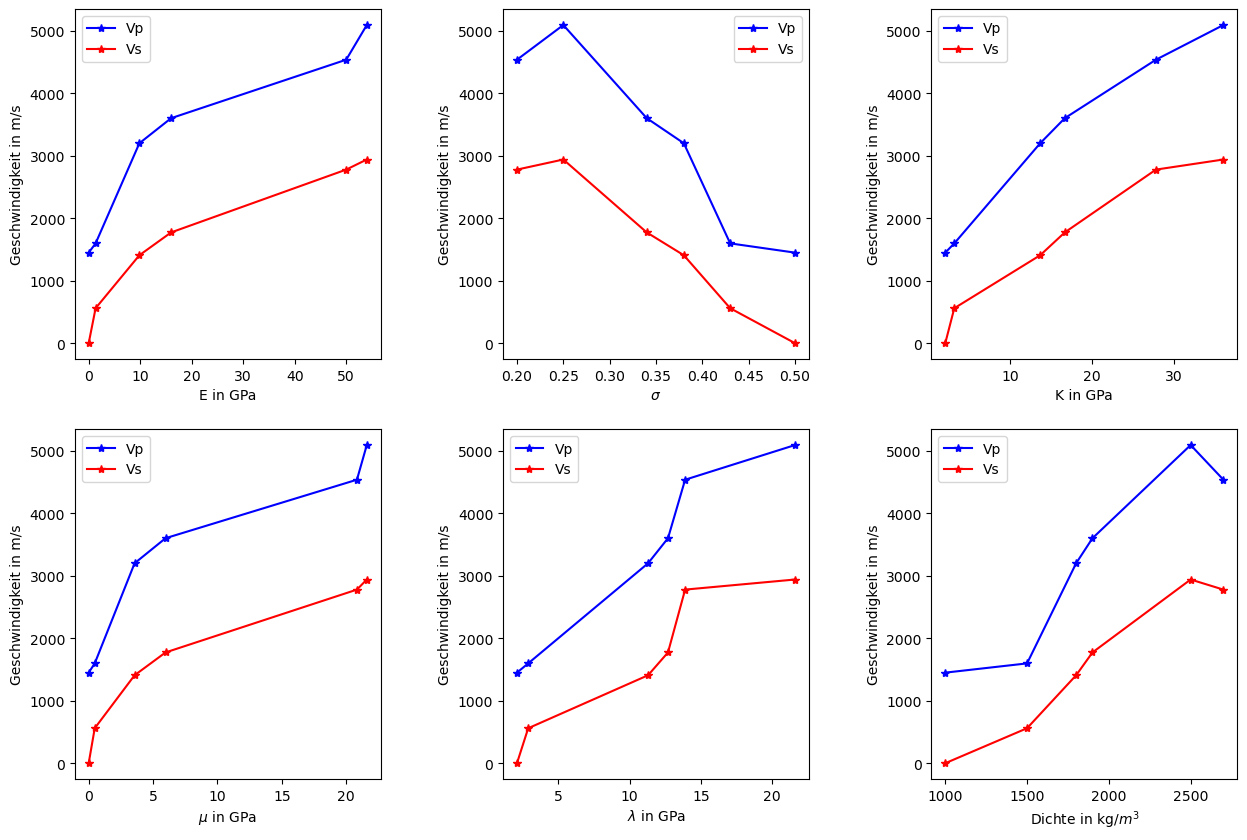

In [5]:
import numpy as np
import matplotlib.pyplot as plt

from ElasticParameter import elastic_moduli

K = np.array([K_Wasser, K_Schlamm, K_Tonschiefer, K_Sandstein, K_Kalkstein, K_Granit])*10**9
sigma = np.array([0.5, 0.43, 0.38, 0.34, 0.25,0.2])
rho = np.array([1000,1500,1800,1900,2500,2700])

plt.figure(figsize=(15,10))

E = np.zeros([6,8])
for i in range(len(K)):
        E[i,:] = elastic_moduli(K = K[i],sigma = sigma[i],rho = rho[i])

rock = ['Wasser','Schlamm','Tonschiefer','Sandstein','Kalkstein','Granit']
param = [r'E in GPa',r'$\sigma$',r'K in GPa',r'$\mu$ in GPa',r'$\lambda$ in GPa',r'Geschwindigkeit in m/s',r'Geschwindigkeit in m/s',r'Dichte in kg/$m^3$']
combi = [0,1,2,3,4,7] 
        
for i in range(len(combi)):
    if i in [0,2,3,4]:
        x = 1/10**9
    else:
        x = 1
    
    plt.subplot(2,3,i+1)
    plt.plot((E[np.argsort(E[:,combi[i]]),combi[i]])*x,(E[np.argsort(E[:,combi[i]]),5]),'b*-',label='Vp')
    plt.plot((E[np.argsort(E[:,combi[i]]),combi[i]])*x,(E[np.argsort(E[:,combi[i]]),6]),'r*-',label='Vs')
    plt.legend()
    plt.xlabel(param[i])
    plt.ylabel(param[6])
plt.xlabel(param[7])
plt.subplots_adjust(wspace = 0.4,hspace = 0.2)
    